# Proyecto 02 - Data Science - Web Scraping de Apartamentos en Alquiler en Zona 14 - Gian Paolo Robelo 20230117

Este proyecto utiliza **BeautifulSoup** y **requests** para realizar scraping de información de apartamentos en alquiler en la página de **Mapainmueble**.

## Descripción del Proyecto

Se extrae la siguiente información de las propiedades listadas en **https://mapainmueble.com/apartamentos-en-alquiler-zona-14/** para **25 páginas**:

- **Título**
- **Precio**
- **Parqueos**
- **Dormitorios**
- **Baños**
- **Tamaño**
- **Propietario**
- **Descripción**
- **Fotos**
- **Enlace**


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# URL de la página web
BASE_URL = "https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/{}"
headers = {
    'User-Agent': ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) ' 'AppleWebKit/537.36 (KHTML, like Gecko) ''Chrome/115.0.0.0 Safari/537.36')
}

In [8]:
import requests
from bs4 import BeautifulSoup

BASE_URL = "https://mapainmueble.com/apartamentos-en-alquiler-zona-14/page/{}/"
headers = {"User-Agent": "Mozilla/5.0"}
apartments = []

# Recorrer las páginas
def get_property_details(url):
    """Accede a la página de la propiedad y extrae los detalles específicos."""
    response = requests.get(url, headers=headers, verify=False)
    if response.status_code != 200:
        print(f"Error al acceder a la propiedad {url} (status code: {response.status_code})")
        return None
    
    soup = BeautifulSoup(response.text, 'html.parser')
    details = {}
    
    # Buscar los contenedores de detalles
    detail_sections = soup.find_all("div", class_="listing_detail col-md-4")
    for detail in detail_sections:
        strong_elem = detail.find("strong")
        if strong_elem and strong_elem.text.strip():
            key = strong_elem.text.strip().replace(":", "")
            value = detail.text.replace(strong_elem.text, "").strip()
            details[key] = value
    
    return details

for page in range(1, 25):
    url = BASE_URL.format(page)
    response = requests.get(url, headers=headers, verify=False)
    
    if response.status_code != 200:
        print(f"Error al acceder a la página {page} (status code: {response.status_code})")
        continue
    
    soup = BeautifulSoup(response.text, 'html.parser')
    listings = soup.find_all("div", class_="listing_wrapper")
    
    if not listings:
        print(f"No se encontraron listados en la página {page}. Verifica el selector.")
    
    for listing in listings:
        try:
            title_elem = listing.find("h4")
            link_elem = title_elem.find("a") if title_elem else None
            title = link_elem.text.strip() if link_elem else "N/A"
            link = link_elem.get("href", "N/A") if link_elem else "N/A"
            
            # Extraer tamaño desde la pantalla principal
            size_elem = listing.find("span", class_="infosize")
            size = size_elem.text.strip() if size_elem else "N/A"
            
            details = get_property_details(link) if link != "N/A" else {}
            
            apartments.append({
                "Título": title,
                "Precio": details.get("Precio", "N/A"),
                "Parqueos": details.get("Parqueos", "N/A"),
                "Dormitorios": details.get("Dormitorios", "N/A"),
                "Baños": details.get("Baños", "N/A"),
                "ID de la propiedad": details.get("ID de la propiedad", "N/A"),
                "Tamaño": size,
                "Enlace": link
            })
        except Exception as e:
            print(f"Error procesando un anuncio: {e}")

print("Extracción completada.")


C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mapainmueble.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mapainmueble.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: Insecur

Error al acceder a la propiedad https://mapainmueble.com/properties/zona-14-apartamento-bonaire-en-renta-caa13528/ (status code: 404)
Error procesando un anuncio: 'NoneType' object has no attribute 'get'


C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mapainmueble.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'mapainmueble.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\gianp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\urllib3\connectionpool.py:1097: Insecur

Extracción completada.


In [9]:
# Convertir la lista de propiedades en un DataFrame y guardarlo en CSV
df = pd.DataFrame(apartments)
df.to_csv("apartamentos_zona_14.csv", index=False, encoding="utf-8-sig")

print("Scraping completado. Datos guardados en 'apartamentos_zona_14.csv'")

Scraping completado. Datos guardados en 'apartamentos_zona_14.csv'


Resumen de datos después de limpieza:
       Precio  Parqueos  Dormitorios  Baños
count     212       212          212    211
mean    2,012         2            2      2
std     1,827         1            1      1
min       625         1            1      1
25%       939         2            2      2
50%     1,625         2            2      2
75%     2,200         2            3      2
max    17,000         4            4      5
Coeficiente: 1157.885774846915
Intercepto: -194.7398728214796
R²: 0.15254390059670153


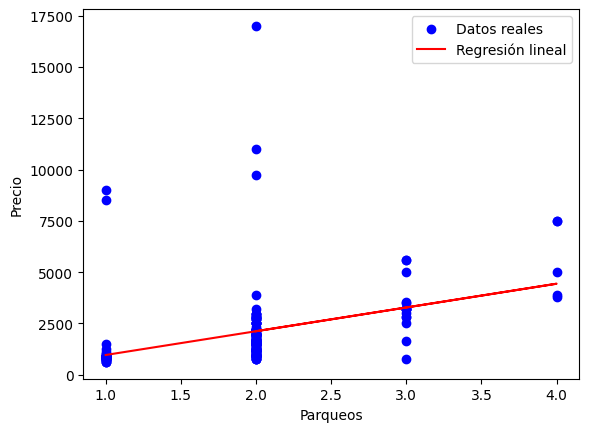

Análisis de regresión completado.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Configurar pandas para evitar notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Cargar los datos desde un archivo CSV
data = pd.read_csv("apartamentos_zona_14.csv")

# Función para limpiar precios
def clean_price(price):
    if pd.isna(price) or price == "N/A":
        return None
    price = re.sub(r'[^0-9]', '', str(price))  # Eliminar caracteres no numéricos
    try:
        return int(price)  # Convertir a entero
    except ValueError:
        return None

# Función para limpiar parqueos
def clean_parking(parking):
    if pd.isna(parking) or parking == "N/A":
        return None
    try:
        return int(parking)
    except ValueError:
        return None

# Aplicar limpieza
data["Precio"] = data["Precio"].apply(clean_price)
data["Parqueos"] = data["Parqueos"].apply(clean_parking)

# Eliminar valores nulos
data.dropna(subset=["Precio", "Parqueos"], inplace=True)

# Verificar si hay datos suficientes
if data.empty:
    print("No hay suficientes datos para la regresión.")
else:
    print("Resumen de datos después de limpieza:")
    print(data.describe())

    X = data[["Parqueos"]]
    y = data["Precio"]

    model = LinearRegression()
    model.fit(X, y)

    # Calcular R²
    r_squared = model.score(X, y)

    print(f"Coeficiente: {model.coef_[0]}")
    print(f"Intercepto: {model.intercept_}")
    print(f"R²: {r_squared}")

    # Graficar los resultados
    plt.scatter(X, y, color='blue', label='Datos reales')
    plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
    plt.xlabel("Parqueos")
    plt.ylabel("Precio")
    plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en la gráfica
    plt.legend()
    plt.show()

print("Análisis de regresión completado.")


Coeficiente de la regresión: 642.8784897383678
Intercepto de la regresión: 613.8396992010023
R²: 0.08836414254513081


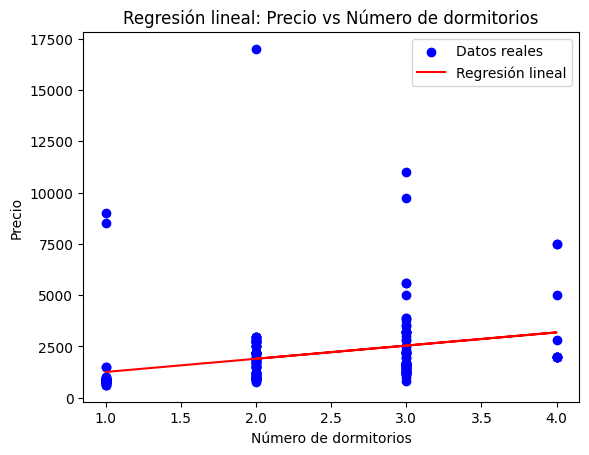

Análisis de regresión completado.


In [32]:
# Realizar una regresión lineal con Precio como variable dependiente y Número de dormitorios como independiente
X = data[["Dormitorios"]]
y = data["Precio"]

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular el R²
r_squared = model.score(X, y)

# Mostrar los resultados del modelo
print(f"Coeficiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")
print(f"R²: {r_squared}")  # Aquí se muestra el R²

# Graficar los resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel("Número de dormitorios")
plt.ylabel("Precio")
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en la gráfica
plt.legend()
plt.title("Regresión lineal: Precio vs Número de dormitorios")
plt.show()

print("Análisis de regresión completado.")


Coeficiente de la regresión: 897.3042568849986
Intercepto de la regresión: 45.47433861409081
R²: 0.14003843457865528


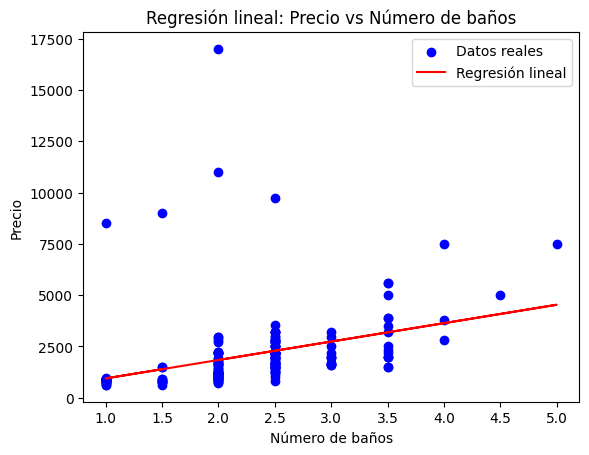

Análisis de regresión completado.


In [33]:
# Eliminar filas con valores nulos en la columna 'Baños'
data_clean = data.dropna(subset=["Baños"])

# Realizar la regresión
X = data_clean[["Baños"]]
y = data_clean["Precio"]

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular el R²
r_squared = model.score(X, y)

# Mostrar los resultados del modelo
print(f"Coeficiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")
print(f"R²: {r_squared}")  # Mostrar el valor de R²

# Graficar los resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel("Número de baños")
plt.ylabel("Precio")
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en la gráfica
plt.legend()
plt.title("Regresión lineal: Precio vs Número de baños")
plt.show()

print("Análisis de regresión completado.")


Coeficiente de la regresión: 7.335964022771672
Intercepto de la regresión: 851.6779706978216
R²: 0.19187862704602043


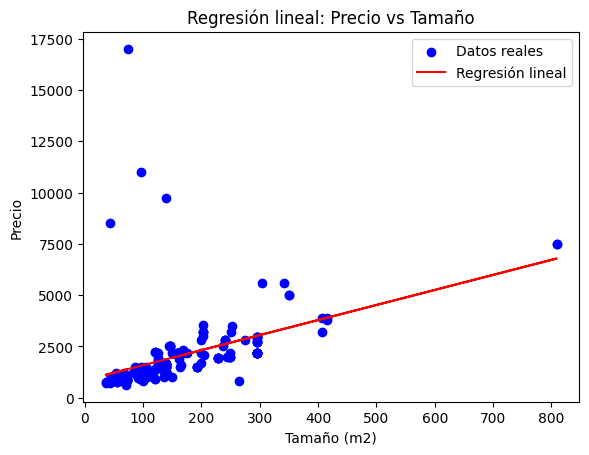

Análisis de regresión completado.


In [34]:
# Función para limpiar el tamaño (eliminar "m2" y convertir a número)
def clean_size(size):
    if pd.isna(size) or size == "N/A":
        return None
    size = str(size).replace("m2", "").strip()  # Eliminar "m2" y espacios extra
    try:
        return float(size)  # Convertir a número
    except ValueError:
        return None

# Limpiar la columna de tamaño
data["Tamaño"] = data["Tamaño"].apply(clean_size)

# Eliminar filas con valores nulos en la columna 'Tamaño'
data_clean = data.dropna(subset=["Tamaño"])

# Realizar la regresión
X = data_clean[["Tamaño"]]
y = data_clean["Precio"]

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Calcular el R²
r_squared = model.score(X, y)

# Mostrar los resultados del modelo
print(f"Coeficiente de la regresión: {model.coef_[0]}")
print(f"Intercepto de la regresión: {model.intercept_}")
print(f"R²: {r_squared}")  # Mostrar el valor de R²

# Graficar los resultados
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='red', label='Regresión lineal')
plt.xlabel("Tamaño (m2)")
plt.ylabel("Precio")
plt.ticklabel_format(style='plain', axis='y')  # Evitar notación científica en la gráfica
plt.legend()
plt.title("Regresión lineal: Precio vs Tamaño")
plt.show()

print("Análisis de regresión completado.")
